In [9]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 
import jax.numpy as jnp
from jax.scipy import stats

In [10]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


# Shear

In [13]:
pfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_45/shear_samples_452_plus.npz"
mfpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_45/shear_samples_452_minus.npz"

In [14]:
dsp = load_dataset(pfpath)
dsm = load_dataset(mfpath)

In [15]:
dsp.keys(), dsp['samples'].keys()

(dict_keys(['samples', 'truth']),
 dict_keys(['g1', 'g2', 'a_logflux', 'mean_logflux', 'mean_loghlr', 'sigma_e', 'sigma_logflux', 'sigma_loghlr']))

In [16]:
g1p = dsp['samples']['g1']
g1m = dsm['samples']['g1']
g1p.shape

(3000,)

In [17]:
g2p = dsp['samples']['g2']
g2m = dsm['samples']['g2']
g2p.shape

(3000,)

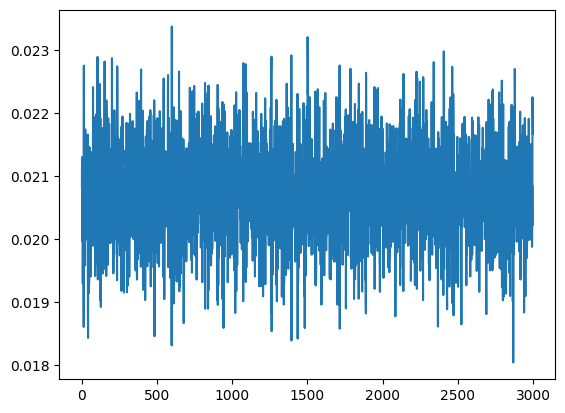

In [18]:
plt.plot(g1p)

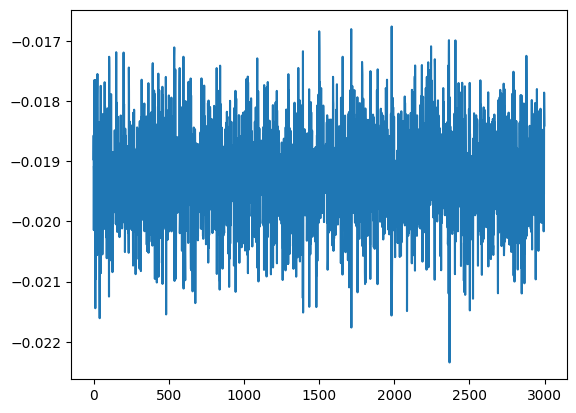

In [19]:
plt.plot(g1m)

In [20]:
m = (g1p.mean() - g1m.mean()) / 2 / 0.02 - 1
c = (g2p.mean() + g2m.mean()) / 2
m, c

(np.float64(0.00025890377202220094), np.float64(-0.0007398094295823772))

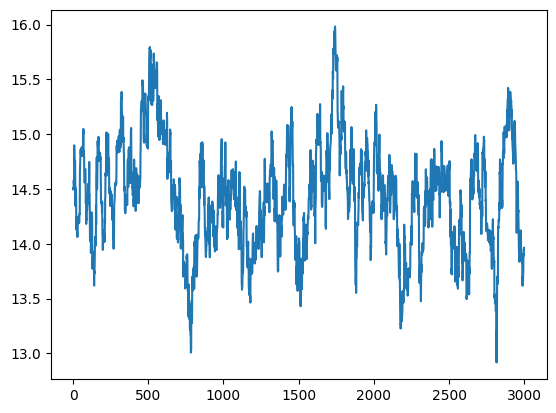

In [21]:
# trace plots of other parameters
plt.plot(dsp['samples']['a_logflux'])

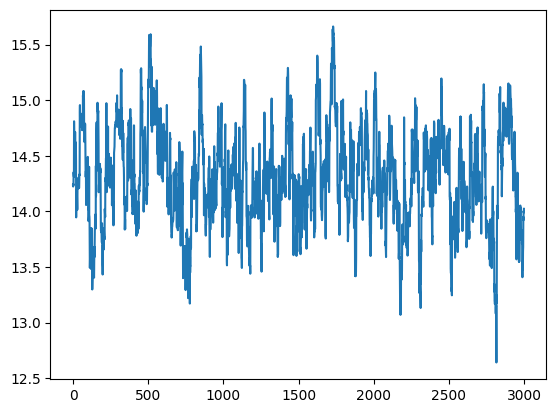

In [22]:
plt.plot(dsm['samples']['a_logflux'])

In [23]:
dsp['samples']['a_logflux'].mean(), dsm['samples']['a_logflux'].mean()

(np.float64(14.436815336096489), np.float64(14.307120825486908))

# Alternative method of estimating errors

In [24]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [25]:
fpath = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_45/g_samples_454_errs.npz"

In [26]:
ds = load_dataset(fpath)

In [27]:
gps = ds['plus']['g']
gps.shape

(500, 1000, 2)

In [28]:
gms = ds['minus']['g']
gms.shape

(500, 1000, 2)

In [29]:
ms = (gps.mean(1)[:, 0] - gms.mean(1)[:, 0]) / 2/ 0.02  - 1
cs = (gps.mean(1)[:, 0] + gms.mean(1)[:, 0]) / 2
ms.shape, cs.shape

((500,), (500,))

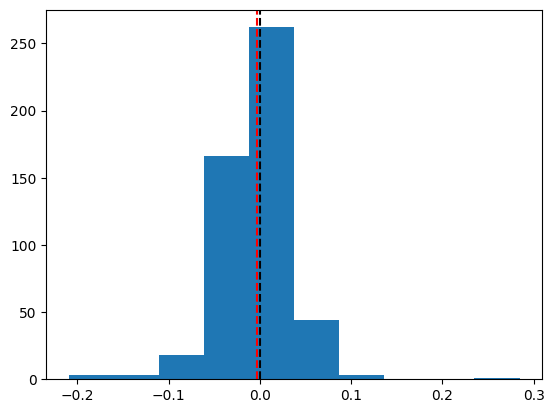

In [31]:
plt.hist(ms)
plt.axvline(m, c='k', ls='--')
plt.axvline(ms.mean(), c='r', ls='--')

In [32]:
# np.argwhere(ms < -0.2)

In [36]:
ms.mean(), m, np.median(ms)

(np.float64(-0.0032615662760964374),
 np.float64(0.00025890377202220094),
 np.float64(-0.0019424128250788986))

In [37]:
ms.std() / np.sqrt(len(ms))

np.float64(0.001711181439296186)

In [38]:
cs.mean(), c, cs.std() / np.sqrt(len(cs))

(np.float64(0.0007686033080815059),
 np.float64(-0.0007398094295823772),
 np.float64(0.0007810514534514683))

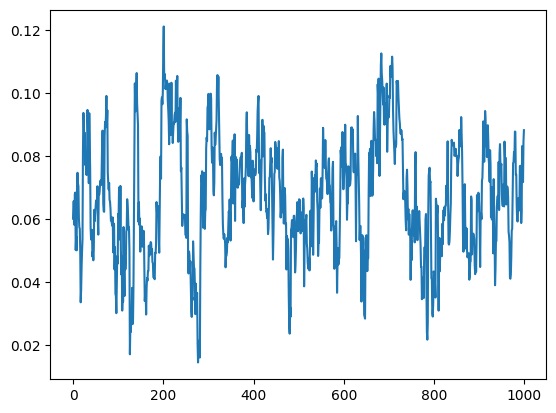

In [39]:
plt.plot(gps[309][:, 0])

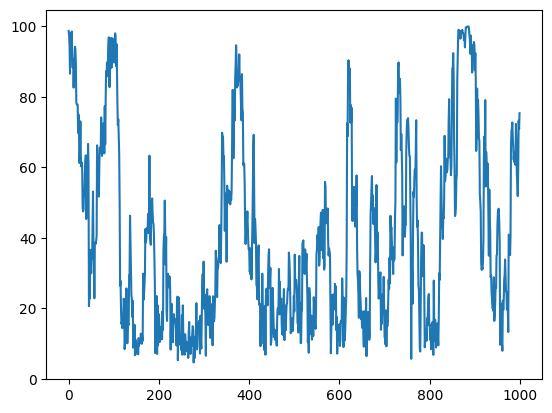

In [40]:
plt.plot(ds['minus']['a_logflux'][309])